# Raisin Class Prediction

Data Set Information:

Images of Kecimen and Besni raisin varieties grown in Turkey were obtained with CVS. A total of 900 raisin grains were used, including 450 pieces from both varieties. These images were subjected to various stages of pre-processing and 7 morphological features were extracted. These features have been classified using three different artificial intelligence techniques.


Attribute Information:

1. Area: Gives the number of pixels within the boundaries of the raisin.
2. Perimeter: It measures the environment by calculating the distance between the boundaries of the raisin and the pixels around it.
3. MajorAxisLength: Gives the length of the main axis, which is the longest line that can be drawn on the raisin.
4. MinorAxisLength: Gives the length of the small axis, which is the shortest line that can be drawn on the raisin.
5. Eccentricity: It gives a measure of the eccentricity of the ellipse, which has the same moments as raisins.
6. ConvexArea: Gives the number of pixels of the smallest convex shell of the region formed by the raisin.
7. Extent: Gives the ratio of the region formed by the raisin to the total pixels in the bounding box.
8. Class: Kecimen and Besni raisin.

https://archive.ics.uci.edu/ml/datasets/Raisin+Dataset

# Import libraries

In [23]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

from scipy.stats import skew

from sklearn.model_selection import cross_validate, cross_val_score
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (14,8)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', 500) 
pd.set_option('display.max_rows', 500)

## Exploratory Data Analysis and Visualization

In [2]:
df = pd.read_excel("Raisin_Dataset.xlsx")
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


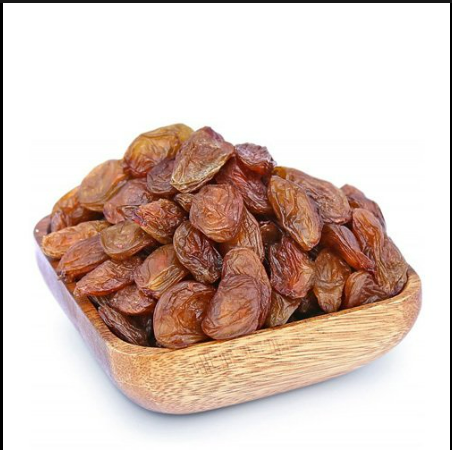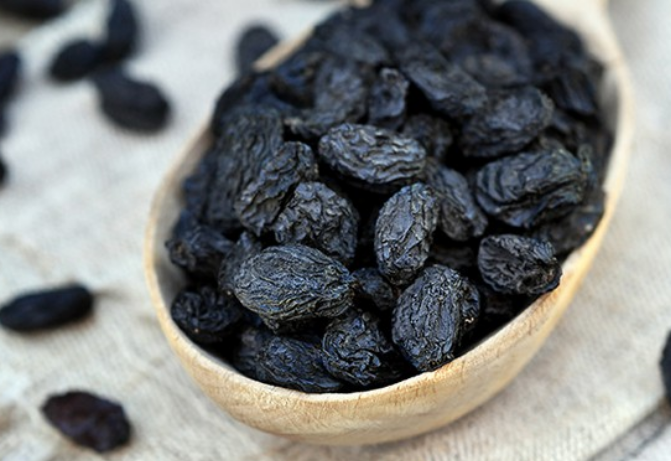

In [4]:
df['Class'].value_counts()

Kecimen    450
Besni      450
Name: Class, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,900.000,87804.128,39002.111,25387.000,59348.000,78902.000,105028.250,235047.000
MajorAxisLength,900.000,430.930,116.035,225.630,345.443,407.804,494.187,997.292
MinorAxisLength,900.000,254.488,49.989,143.711,219.111,247.848,279.889,492.275
Eccentricity,900.000,0.782,0.090,0.349,0.742,0.799,0.843,0.962
ConvexArea,900.000,91186.090,40769.290,26139.000,61513.250,81651.000,108375.750,278217.000
Extent,900.000,0.700,0.053,0.380,0.671,0.707,0.735,0.835
Perimeter,900.000,1165.907,273.764,619.074,966.411,1119.509,1308.390,2697.753


In [8]:
df2 = df.copy()

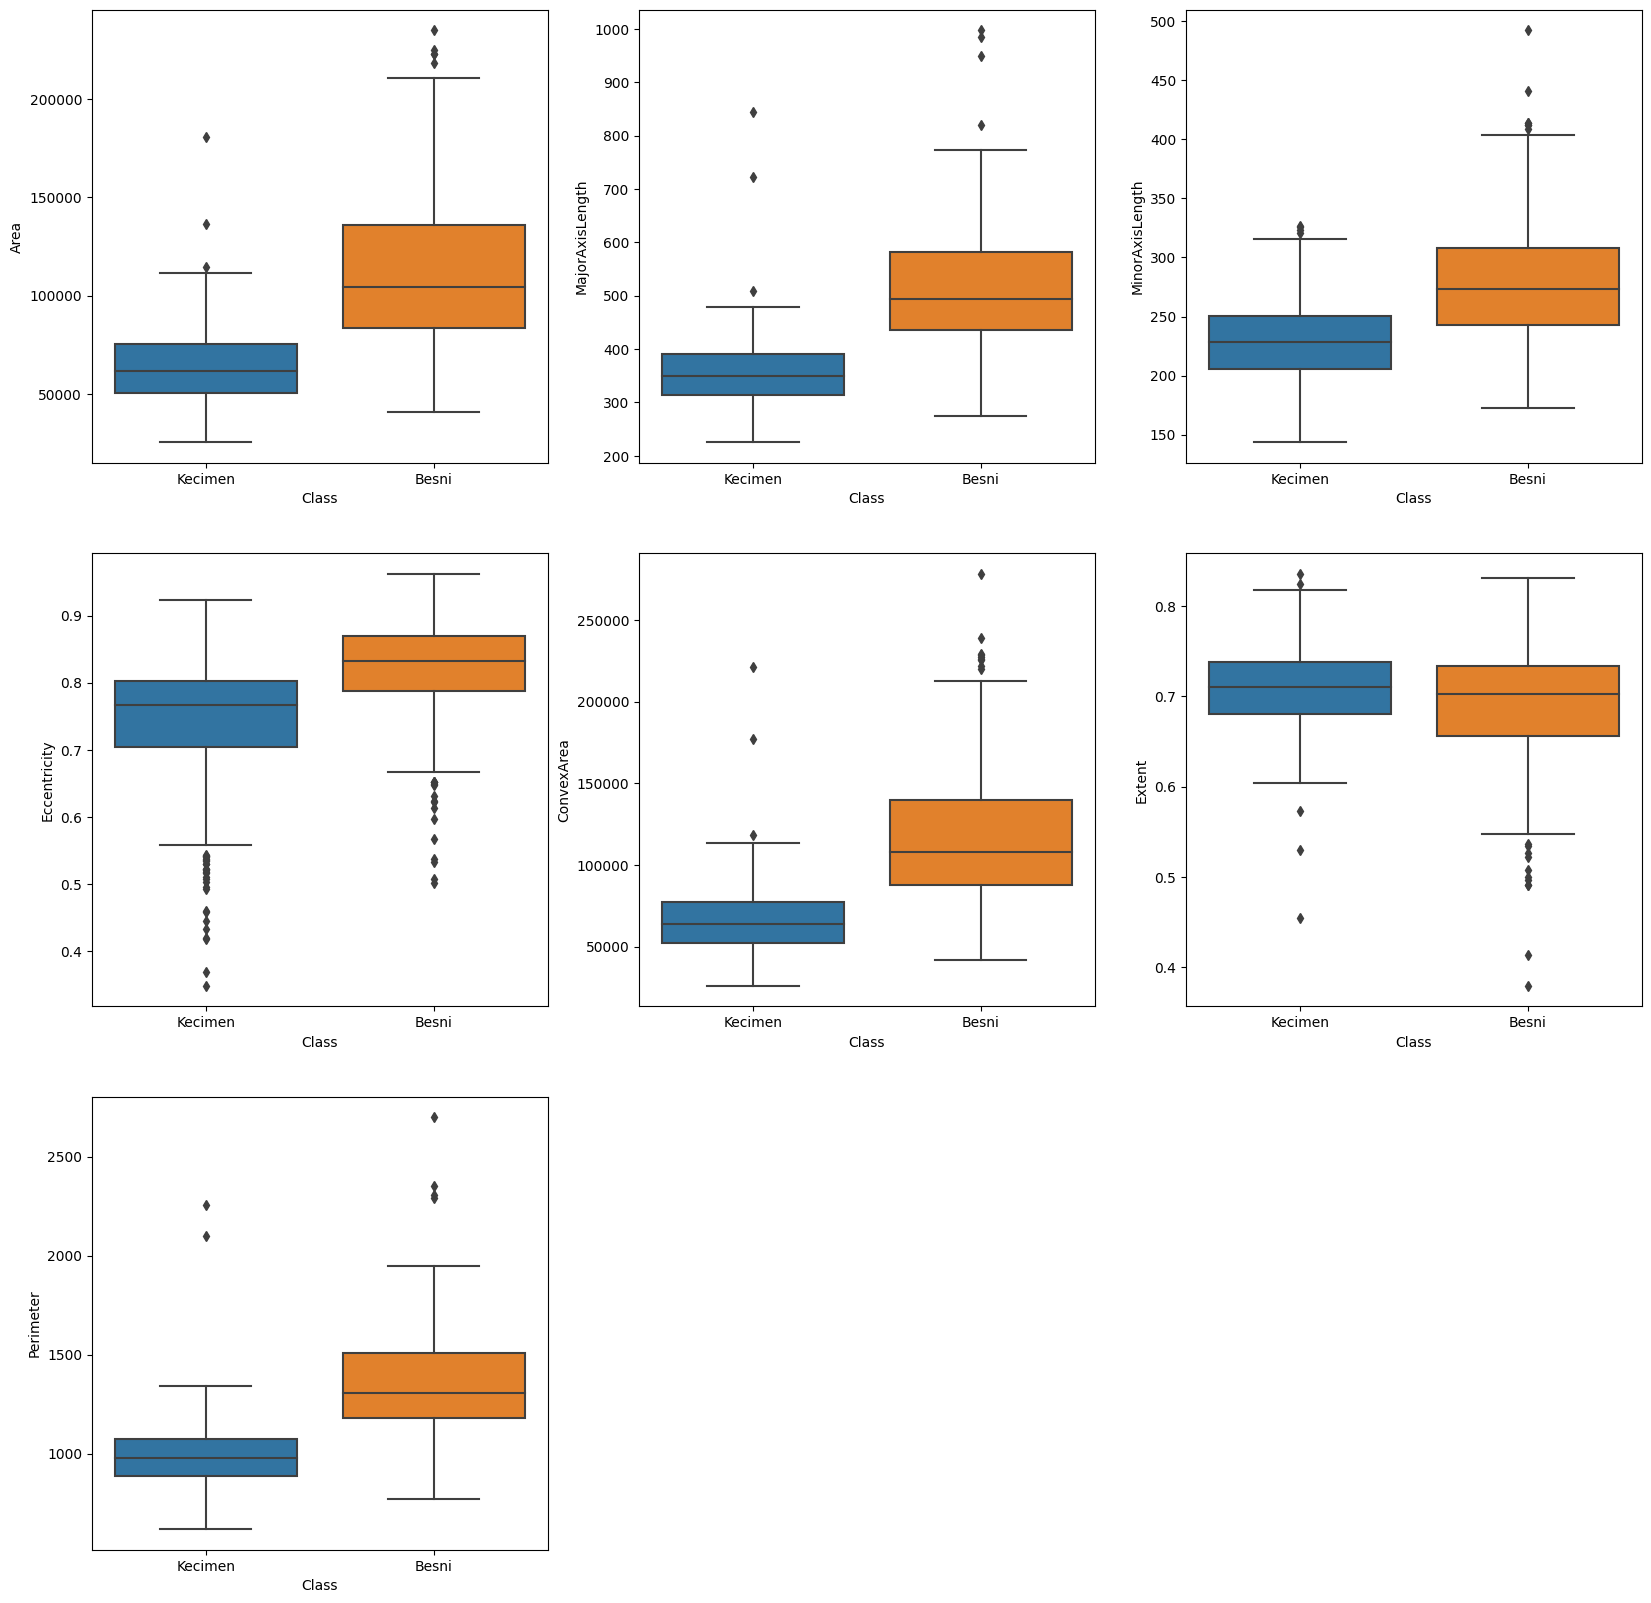

In [25]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "Class":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='Class',y=feature,data=df)
plt.show()

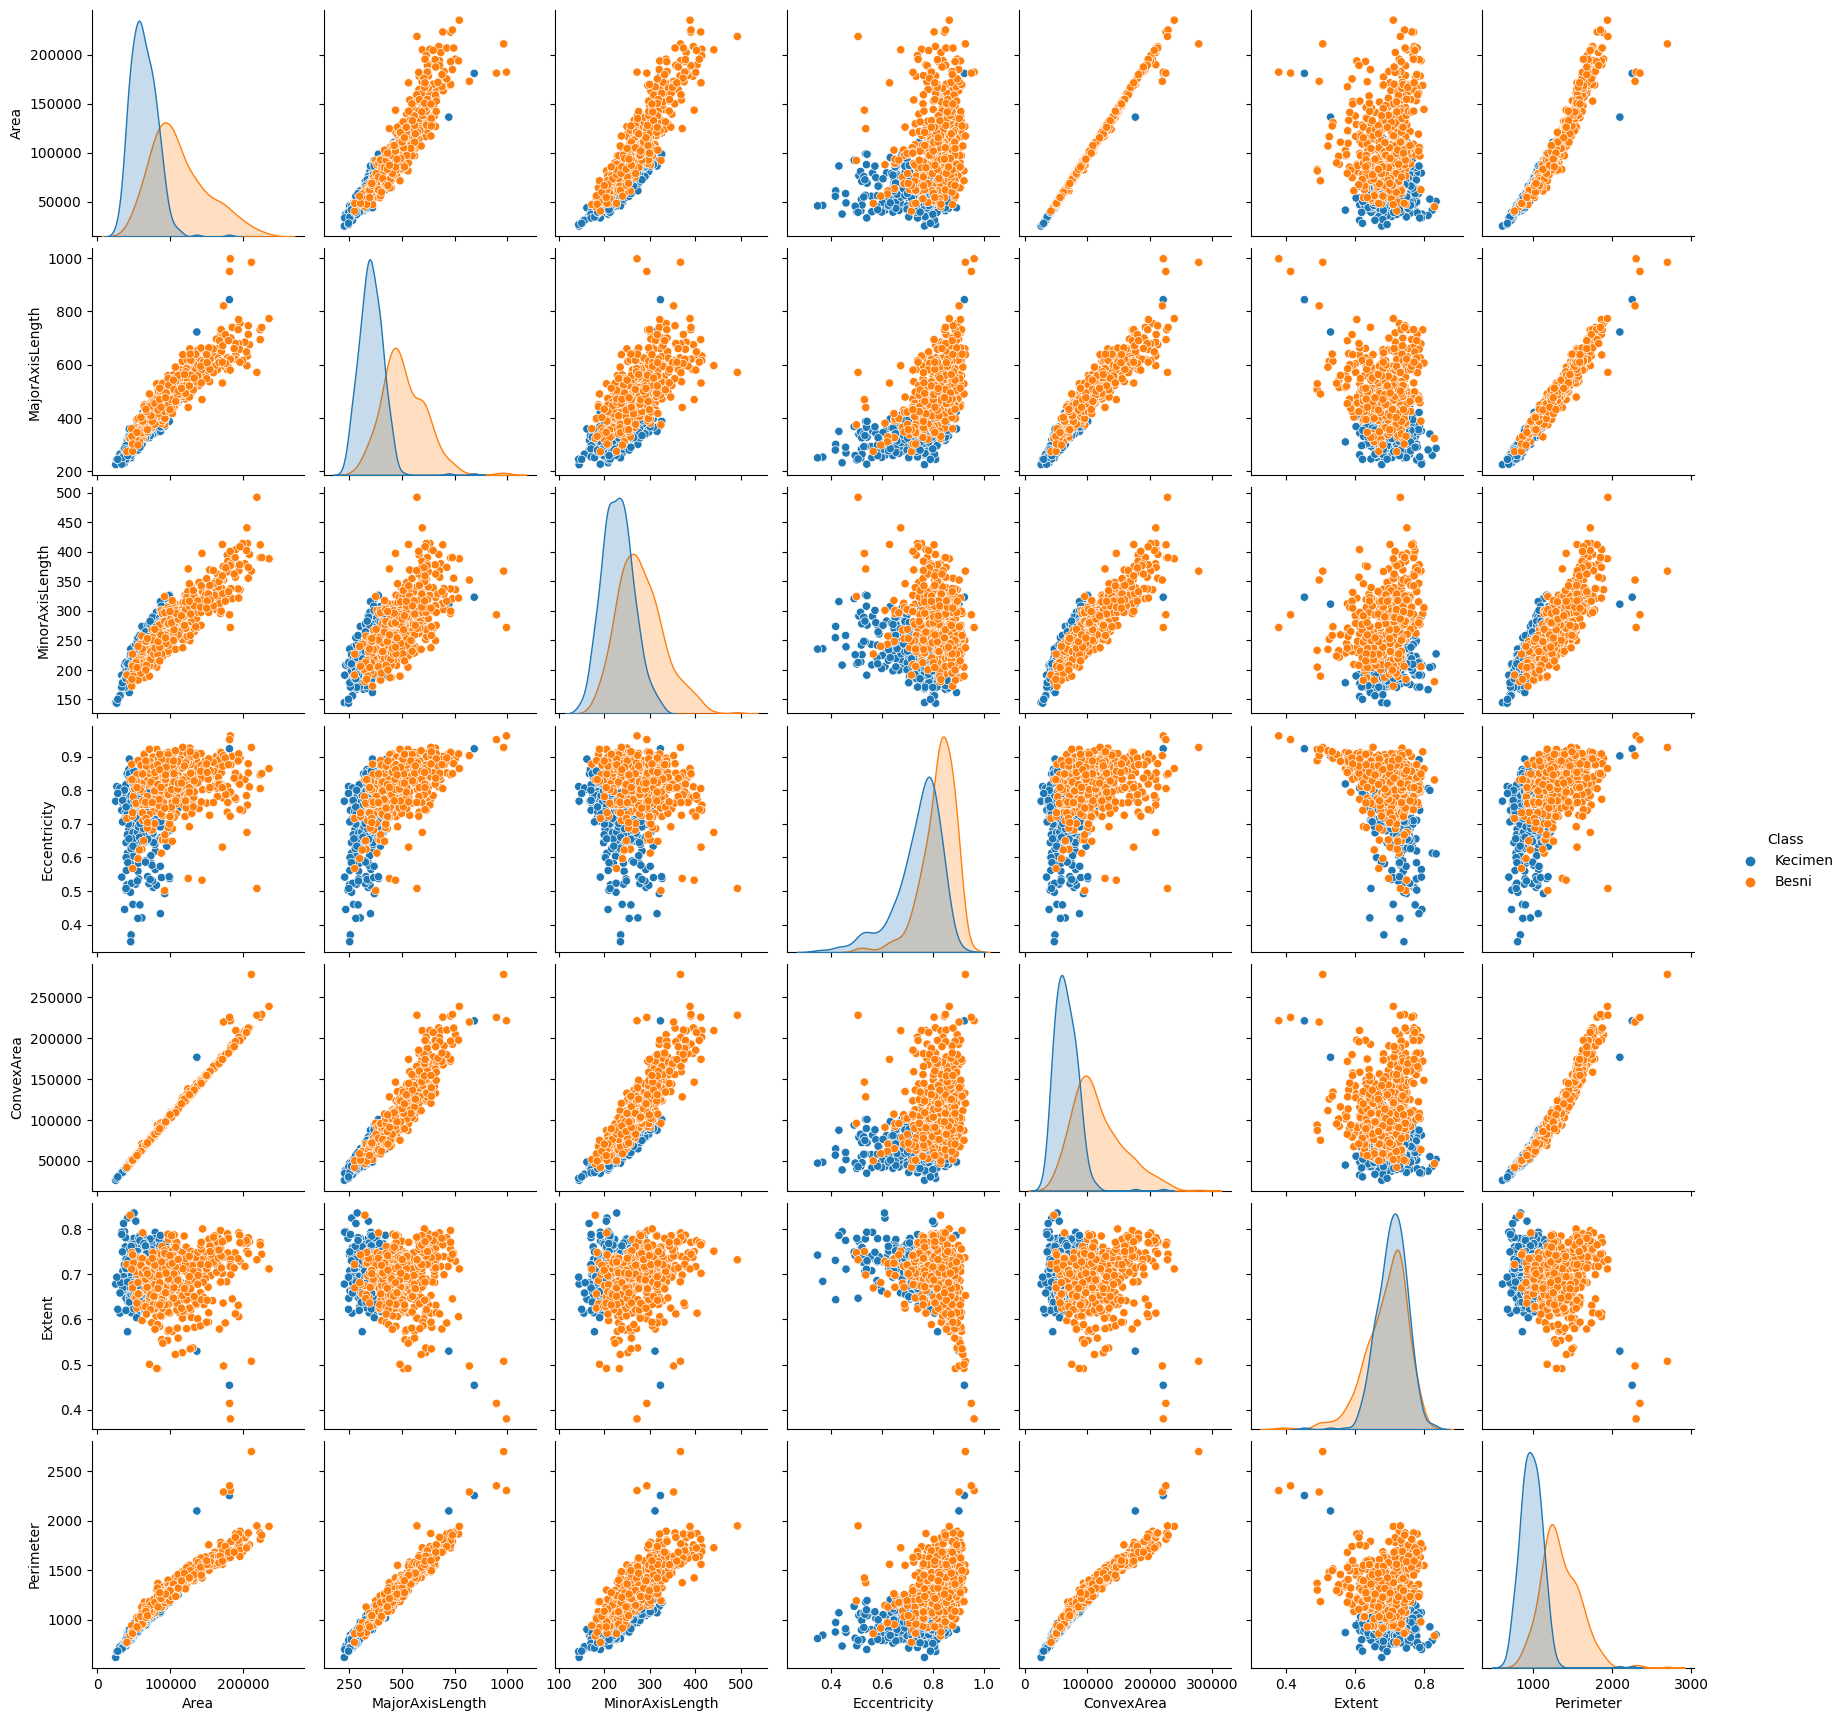

In [21]:
sns.pairplot(df, hue ='Class');

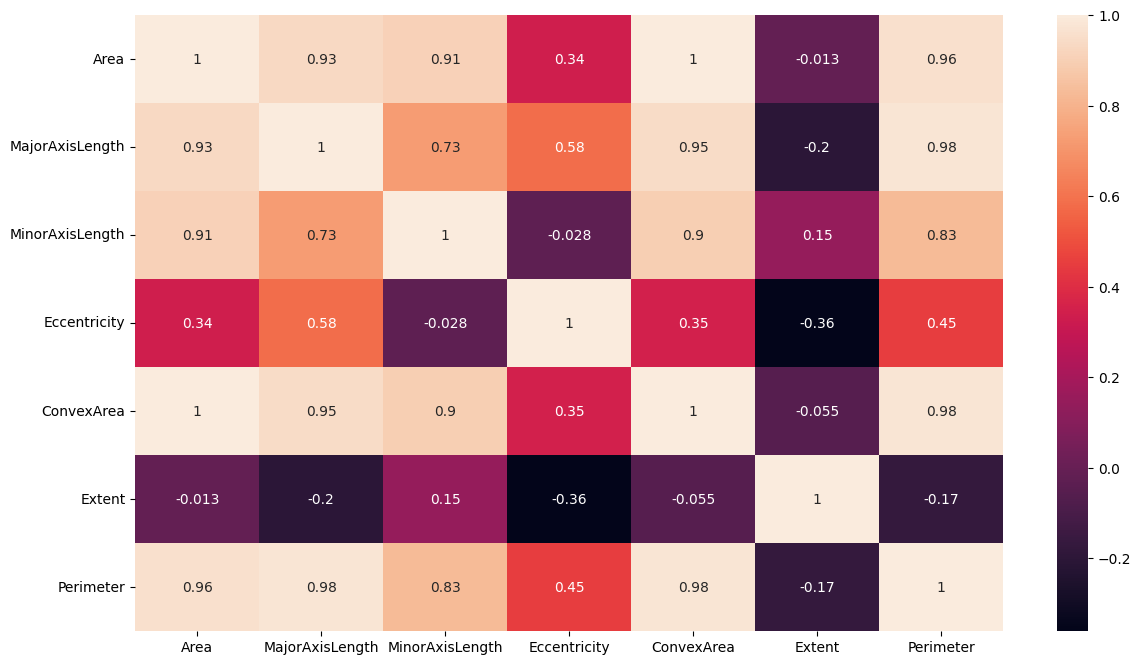

In [22]:
sns.heatmap(df.corr(), annot = True);

## Train | Test Split and Scaling

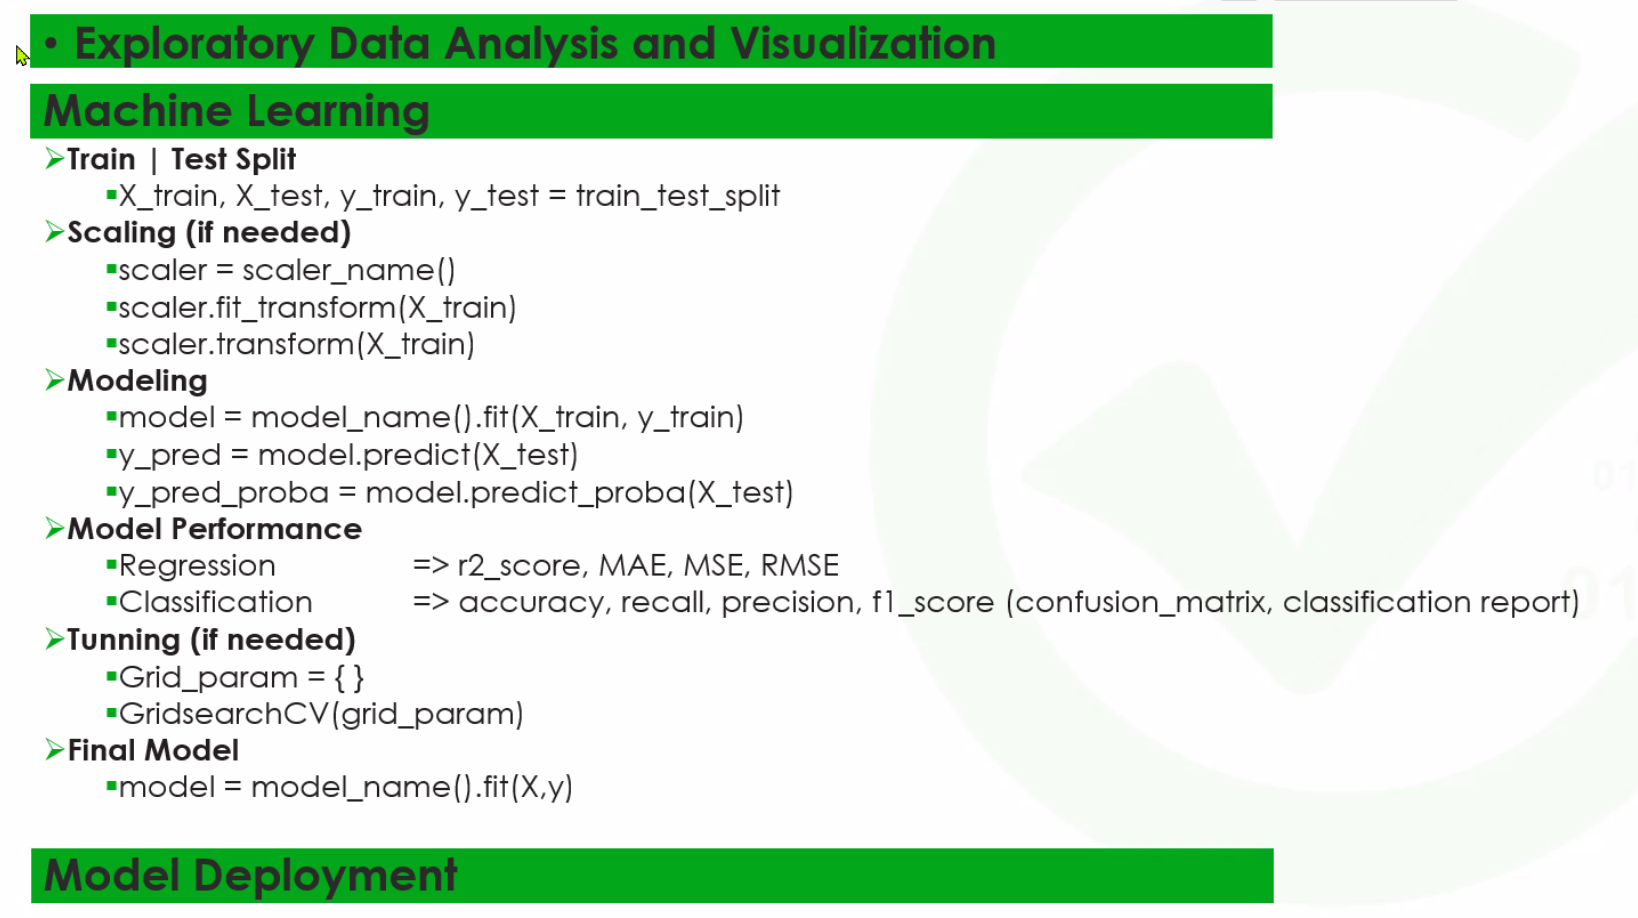

In [26]:
X = df.drop('Class', axis = 1)
y = df['Class']

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state= 42)

In [32]:
scaler = StandardScaler()

In [33]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

In [36]:
log_model = LogisticRegression()

In [37]:
log_model.fit(X_train_scaled,y_train)
y_pred = log_model.predict(X_test_scaled)
y_pred

array(['Besni', 'Kecimen', 'Kecimen', 'Besni', 'Kecimen', 'Kecimen',
       'Kecimen', 'Besni', 'Kecimen', 'Kecimen', 'Besni', 'Besni',
       'Besni', 'Kecimen', 'Besni', 'Besni', 'Besni', 'Kecimen',
       'Kecimen', 'Besni', 'Kecimen', 'Besni', 'Kecimen', 'Kecimen',
       'Besni', 'Kecimen', 'Besni', 'Besni', 'Besni', 'Besni', 'Kecimen',
       'Besni', 'Besni', 'Besni', 'Besni', 'Besni', 'Kecimen', 'Besni',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen',
       'Besni', 'Besni', 'Kecimen', 'Besni', 'Besni', 'Besni', 'Besni',
       'Kecimen', 'Besni', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen',
       'Besni', 'Kecimen', 'Besni', 'Besni', 'Kecimen', 'Besni',
       'Kecimen', 'Kecimen', 'Kecimen', 'Besni', 'Besni', 'Kecimen',
       'Kecimen', 'Besni', 'Besni', 'Kecimen', 'Kecimen', 'Besni',
       'Besni', 'Kecimen', 'Besni', 'Kecimen', 'Besni', 'Besni',
       'Kecimen', 'Besni', 'Kecimen', 'Besni', 'Besni', 'Kecimen',
       'Besni', 'Besni', 'Besni', '

In [38]:
y_pred_proba = log_model.predict_proba(X_test_scaled)
y_pred_proba

array([[7.77508721e-01, 2.22491279e-01],
       [2.24746787e-01, 7.75253213e-01],
       [2.08363054e-02, 9.79163695e-01],
       [9.59156370e-01, 4.08436295e-02],
       [2.21276226e-02, 9.77872377e-01],
       [4.76651596e-01, 5.23348404e-01],
       [1.57743439e-02, 9.84225656e-01],
       [5.15183469e-01, 4.84816531e-01],
       [3.40642242e-01, 6.59357758e-01],
       [3.41060458e-01, 6.58939542e-01],
       [7.30734208e-01, 2.69265792e-01],
       [9.73273015e-01, 2.67269846e-02],
       [9.88308970e-01, 1.16910299e-02],
       [1.98422100e-01, 8.01577900e-01],
       [9.98439328e-01, 1.56067163e-03],
       [9.93761789e-01, 6.23821092e-03],
       [6.41869049e-01, 3.58130951e-01],
       [1.05418180e-02, 9.89458182e-01],
       [3.74268625e-01, 6.25731375e-01],
       [7.06089541e-01, 2.93910459e-01],
       [1.69319778e-01, 8.30680222e-01],
       [9.93813356e-01, 6.18664446e-03],
       [7.90292424e-02, 9.20970758e-01],
       [1.07950365e-01, 8.92049635e-01],
       [9.904152

## Model Performance

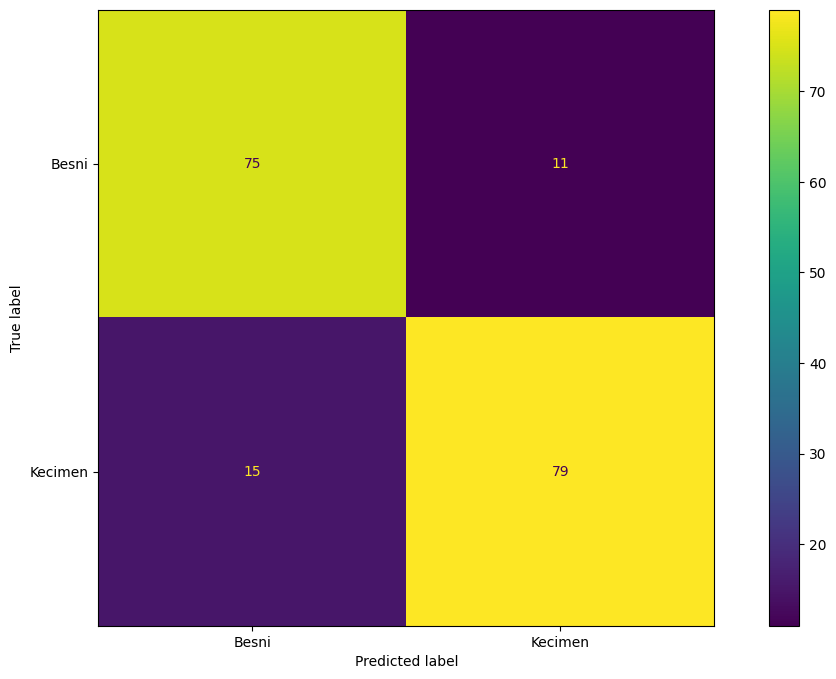

In [39]:
plot_confusion_matrix(log_model, X_test_scaled, y_test);

In [40]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [41]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[75 11]
 [15 79]]
              precision    recall  f1-score   support

       Besni       0.83      0.87      0.85        86
     Kecimen       0.88      0.84      0.86        94

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180


Train_Set
[[308  56]
 [ 39 317]]
              precision    recall  f1-score   support

       Besni       0.89      0.85      0.87       364
     Kecimen       0.85      0.89      0.87       356

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720



In [45]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:,1]#1 olma olasılığı
test_data.sample(10)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class,pred,pred_proba
428,48093,329.936,187.042,0.824,49367,0.745,858.386,Kecimen,Kecimen,0.924
444,67874,360.023,243.272,0.737,69889,0.678,1035.277,Kecimen,Kecimen,0.770
192,37569,232.428,208.152,0.445,38874,0.794,734.102,Kecimen,Kecimen,0.997
97,59282,329.243,233.775,0.704,60580,0.726,920.573,Kecimen,Kecimen,0.927
265,78883,395.100,256.965,0.760,80973,0.678,1092.709,Kecimen,Kecimen,0.605
139,110616,461.145,306.899,0.746,112150,0.752,1252.875,Kecimen,Besni,0.269
227,65469,374.466,227.539,0.794,68018,0.714,1020.029,Kecimen,Kecimen,0.748
734,100186,462.506,277.699,0.800,101921,0.682,1217.831,Besni,Besni,0.233
525,113029,558.516,265.284,0.880,116783,0.662,1419.577,Besni,Besni,0.023
857,120818,492.607,315.201,0.768,123230,0.672,1311.522,Besni,Besni,0.113


### Cross Validate

In [46]:
from sklearn.model_selection import cross_validate

In [50]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                                   'f1_weighted'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted
1,0.006,0.002,0.847,0.850,0.847,0.847
2,0.004,0.002,0.875,0.882,0.875,0.874
3,0.005,0.003,0.819,0.820,0.819,0.819
4,0.005,0.004,0.944,0.946,0.944,0.944
5,0.006,0.003,0.861,0.866,0.861,0.861
6,0.006,0.003,0.889,0.890,0.889,0.889
7,0.004,0.002,0.778,0.782,0.778,0.777
8,0.005,0.003,0.833,0.838,0.833,0.833
9,0.005,0.002,0.931,0.931,0.931,0.931
10,0.003,0.003,0.903,0.911,0.903,0.902


In [51]:
df_scores.mean()[2:]

test_accuracy             0.868
test_precision_weighted   0.872
test_recall_weighted      0.868
test_f1_weighted          0.868
dtype: float64

### GridSearchCV

In [54]:
from sklearn.model_selection import GridSearchCV


model = LogisticRegression()

penalty = ["l2", "none"]

C = np.logspace(-1, 5, 20)
class_weight= ["balanced", None] 


solver = ["lbfgs", "liblinear", "sag", "saga"] 
param_grid = {"penalty" : penalty,
              "C" : C,
              "class_weight":class_weight,
              "solver":solver}
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = "recall",
                          n_jobs = -1)

In [55]:
grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'class_weight': ['balanced', None],
                         'penalty': ['l2', 'none'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='recall')

In [56]:
grid_model.best_params_

{'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs'}

In [57]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[75 11]
 [14 80]]
              precision    recall  f1-score   support

       Besni       0.84      0.87      0.86        86
     Kecimen       0.88      0.85      0.86        94

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180


Train_Set
[[305  59]
 [ 38 318]]
              precision    recall  f1-score   support

       Besni       0.89      0.84      0.86       364
     Kecimen       0.84      0.89      0.87       356

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720



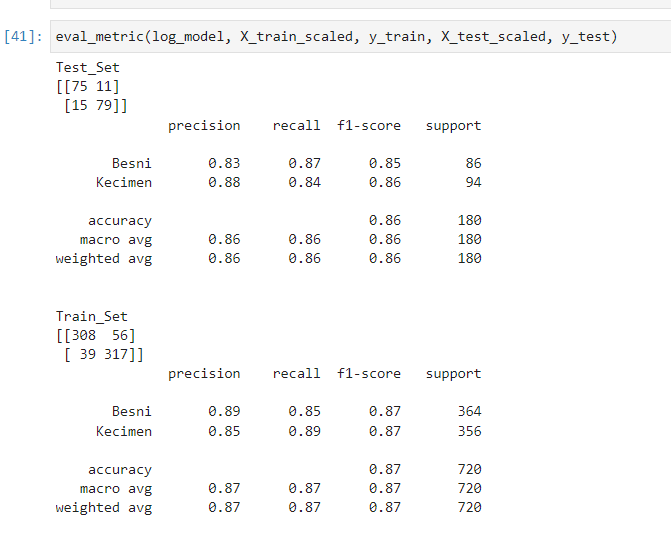

## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

In [58]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

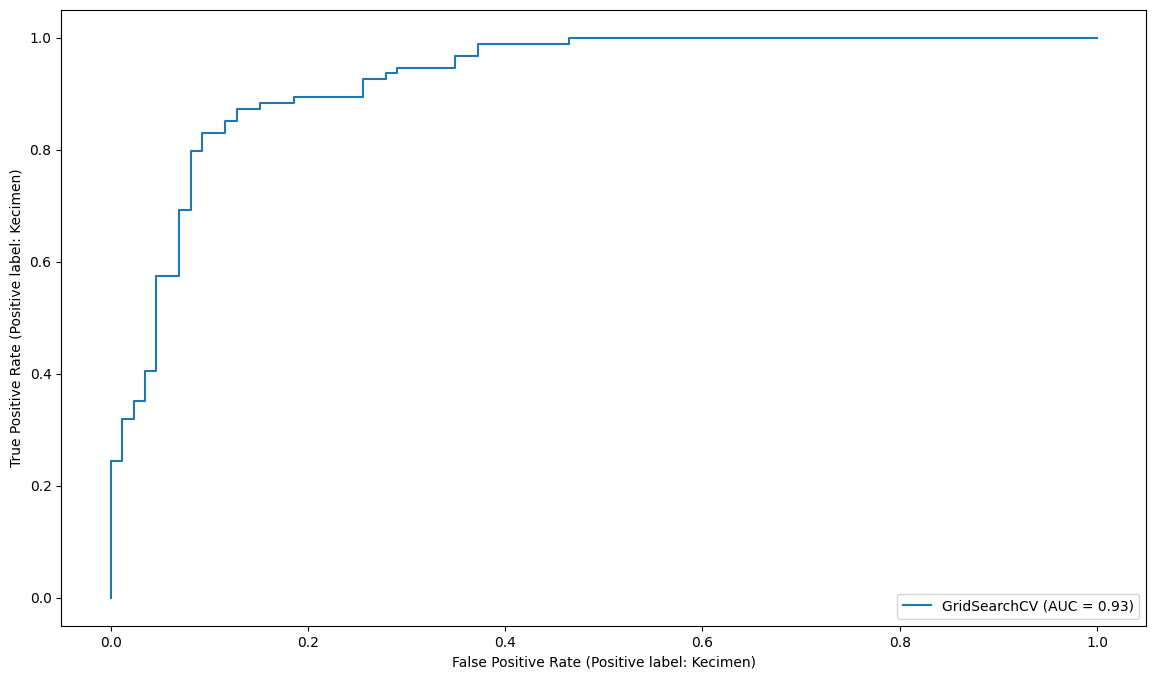

In [60]:
plot_roc_curve(grid_model, X_test_scaled, y_test)

plt.show()

# Conclusion 

## FINAL MODEL 

In [64]:
scaler = StandardScaler().fit(X)

In [65]:
X_scaled = scaler.transform(X)

In [66]:
final_model = LogisticRegression(C=0.1, class_weight = "balanced", penalty='l2', solver='lbfgs').fit(X_scaled, y)

In [71]:
import pickle
pickle.dump(scaler, open("scaler_raisin", "wb"))

In [72]:
pickle.dump(final_model, open("final_model_raisin", 'wb'))

## PREDICTING NEW DATA

In [67]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,900.000,87804.128,39002.111,25387.000,59348.000,78902.000,105028.250,235047.000
MajorAxisLength,900.000,430.930,116.035,225.630,345.443,407.804,494.187,997.292
MinorAxisLength,900.000,254.488,49.989,143.711,219.111,247.848,279.889,492.275
Eccentricity,900.000,0.782,0.090,0.349,0.742,0.799,0.843,0.962
ConvexArea,900.000,91186.090,40769.290,26139.000,61513.250,81651.000,108375.750,278217.000
Extent,900.000,0.700,0.053,0.380,0.671,0.707,0.735,0.835
Perimeter,900.000,1165.907,273.764,619.074,966.411,1119.509,1308.390,2697.753


In [80]:
my_dict = {"Area": [2600, 7000, 9500],
           "MajorAxisLength": [230, 366, 450],
           "MinorAxisLength": [150, 380, 275],
           "Eccentricity": [0.380, 0.600, 0.800],
           "ConvexArea": [27748, 65132, 100055],
           "Extent": [0.32, 0.77, 0.81],
           "Perimeter": [666, 999, 1255]}

In [81]:
sample = pd.DataFrame(my_dict)
sample

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,2600,230,150,0.380,27748,0.320,666
1,7000,366,380,0.600,65132,0.770,999
2,9500,450,275,0.800,100055,0.810,1255


In [82]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_new = scaler.fit_transform(sample)

y_pred = final_model.predict(X_new)


In [83]:
y_pred

array(['Kecimen', 'Besni', 'Besni'], dtype=object)

In [85]:
result = pd.DataFrame({'Area': sample['Area'],
                       'MajorAxisLength': sample['MajorAxisLength'],
                       'MinorAxisLength': sample['MinorAxisLength'],
                       'Eccentricity': sample['Eccentricity'],
                       'ConvexArea': sample['ConvexArea'],
                       'Extent': sample['Extent'],
                       'Perimeter': sample['Perimeter'],
                       'Target': y_pred})
result

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Target
0,2600,230,150,0.380,27748,0.320,666,Kecimen
1,7000,366,380,0.600,65132,0.770,999,Besni
2,9500,450,275,0.800,100055,0.810,1255,Besni
